In [3]:
import nltk
import os
from nltk import word_tokenize
from nltk.corpus import stopwords
import pandas as pd
from gensim.models import Word2Vec
import string
from collections import Counter
import gensim.downloader as api
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
import gensim
import pprint
from gensim import corpora
from gensim.utils import simple_preprocess
import numpy as np
import math
import pickle

In [51]:
class CreepyMetric:
    def __init__(self,noun_weight, action_weight, time_weight, adjective_weight):
        self.scores = {"noun_weight":noun_weight,
                      "action_weight":action_weight,
                      "time_weight":time_weight,
                      "adjective_weight":adjective_weight}

        self.noun = ["creature","zombie","ghost","spirit","monster","demon","devil","unhuman","body", "clown","witch","body",
                      "not human","non human","beast","zombie","vampire","Devil","Satan","murderer","torso", "cabin","woods","forest",
                     "bed","playground","hospital","asylum","haunted house","cemetary","graveyard","grave",
                     "institute","mansion","noise","shadow","darkness","mirror","footsteps","dead","death","murder","voodoo",
                    "sound","noises","silhoutte","blackness","void","nothingness","decomposed","decay","stench","odor","filth"]
        self.action = ["scream","silence","quiet","cry","weep","cackle","stare","watch","wail","crime","noose","kill","creak",
                       "homocide","shriek","whimper","gasp","sob","moan","yell","convulse","spasm","hyperventilate","thump",
                       "bang","squeak","decomposing","rot","die","kill"]
        self.time = ["midnight","after dark","3am","12am","night shift","storm","closing","after hours","11pm","blizzard",
                       "fog","closed","locking"]
        self.adjective = ["alone","abandoned","scary","creepy","horror","uncomfortable","strange","abnormal","spooky",
                        "uneasy","anxious","weird","odd","peculiar","abnormal","extraordinary","uncanny"]

        self.creepy_keywords = {'noun':self.noun,
                   'action':self.action,
                   'time':self.time,
                    'adjective':self.adjective}
        
        self.totalkey = []
        for key, value in self.creepy_keywords.items():
            self.totalkey.extend(value)
        
    def preprocess(self,text):
        text = text.lower()
        text_p = "".join([char for char in text if char not in string.punctuation])
        words = word_tokenize(text_p)
        stop_words = stopwords.words("english")
        filtered = [word for word in words if not word in stop_words]
        return filtered

In [52]:
noun_weightage = 0.6
action_weightage = 0.6
time_weightage = 0.2
adjective_weightage = 0.6

metric = CreepyMetric(noun_weightage,action_weightage,time_weightage,adjective_weightage)
all_words = []
[[all_words.extend(w)] for w in metric.creepy_keywords.values()]
all_words

['creature',
 'zombie',
 'ghost',
 'spirit',
 'monster',
 'demon',
 'devil',
 'unhuman',
 'body',
 'clown',
 'witch',
 'body',
 'not human',
 'non human',
 'beast',
 'zombie',
 'vampire',
 'Devil',
 'Satan',
 'murderer',
 'torso',
 'cabin',
 'woods',
 'forest',
 'bed',
 'playground',
 'hospital',
 'asylum',
 'haunted house',
 'cemetary',
 'graveyard',
 'grave',
 'institute',
 'mansion',
 'noise',
 'shadow',
 'darkness',
 'mirror',
 'footsteps',
 'dead',
 'death',
 'murder',
 'voodoo',
 'sound',
 'noises',
 'silhoutte',
 'blackness',
 'void',
 'nothingness',
 'decomposed',
 'decay',
 'stench',
 'odor',
 'filth',
 'scream',
 'silence',
 'quiet',
 'cry',
 'weep',
 'cackle',
 'stare',
 'watch',
 'wail',
 'crime',
 'noose',
 'kill',
 'creak',
 'homocide',
 'shriek',
 'whimper',
 'gasp',
 'sob',
 'moan',
 'yell',
 'convulse',
 'spasm',
 'hyperventilate',
 'thump',
 'bang',
 'squeak',
 'decomposing',
 'rot',
 'die',
 'kill',
 'midnight',
 'after dark',
 '3am',
 '12am',
 'night shift',
 'storm

In [84]:
##CREEPY PASTA
category_counter = Counter()
totalpasta=0
for file in os.listdir(os.getcwd()):
    if(file.endswith("csv")):
        csv = pd.read_csv(file)
        df = pd.DataFrame(csv)
        df = df[(df['selftext']!="[deleted]")&((df['selftext']!="[removed]"))]
        for passage in df['selftext'].dropna():
            totalpasta+=1
            for category in metric.creepy_keywords.keys():
                for word in metric.creepy_keywords[category]:
                    if word in passage:
                        category_counter[category] += 1
                        
print(totalpasta)

21090


In [99]:
test = pd.read_csv("../test1.csv")
testdf = pd.DataFrame(test)
test.head()

,Subreddit,Category,Counts,Total,Density
0,Creepypasta,Noun,78727,21090.0,3.733
1,Creepypasta,Action,61964,NaN,2.938
2,Creepypasta,Adjective,27731,NaN,1.315
3,Creepypasta,Time,7404,NaN,0.351
4,Non Creepy,Noun,314945,472678.0,0.666


Text(0.5, 1.0, 'Grouped Barplot: Creepy Word Count')

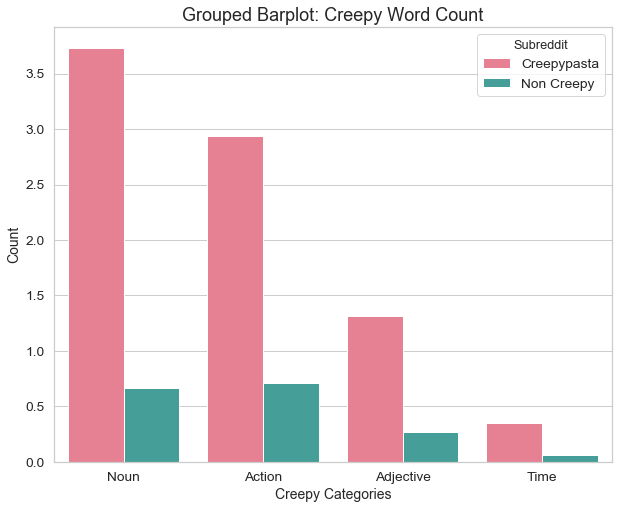

In [100]:
##This figure gives us the occurence of words per post in each category of creepy keywords for creepy vs non creepy subreddits

plt.figure(figsize=(10, 8))
sns.barplot(x="Category", y="Density", hue="Subreddit", palette='husl', data=testdf)
plt.ylabel("Count", size=14)
plt.xlabel("Creepy Categories", size=14)
plt.title("Grouped Barplot: Creepy Word Count", size=18)

In [94]:
##CONFESSION
# category_counter_nc = Counter()
# total_nc=0
for file in os.listdir(os.getcwd()):
    if(file.endswith("csv")):
        csv = pd.read_csv(file)
        df = pd.DataFrame(csv)
        df = df[(df['selftext']!="[deleted]")&((df['selftext']!="[removed]"))]
        for passage in df['selftext'].dropna():
            total_nc+=1
            for category in metric.creepy_keywords.keys():
                for word in metric.creepy_keywords[category]:
                    if word in passage:
                        category_counter_nc[category] += 1
                        
category_counter_nc

Counter({'action': 337081, 'noun': 314945, 'adjective': 125575, 'time': 28985})

In [95]:
##total number of non creepy subreddit posts
total_nc

472678

## PCA!

In [104]:
model = Word2Vec.load('models/model.bin')
print(model)

Word2Vec(vocab=48172, size=100, alpha=0.025)


In [108]:
#We are counting the occurence of each creepy word within our keyword dictionary, in creepypasta posts
total_keywords_creepypasta = Counter()
for csv in os.listdir(os.getcwd()):
    if(csv.endswith(".csv")):
#         print(csv)
        c = pd.read_csv(csv)
        df = pd.DataFrame(c)
        try:
            for j in df['selftext']:
                preprocessed = metric.preprocess(j)
                for word in preprocessed:
                    if word in all_words:
                        total_keywords_creepypasta[word] += 1
        except (KeyError, AttributeError) as e:
            pass
print(total_keywords_creepypasta)

Counter({'body': 148, 'bed': 143, 'dead': 131, 'sound': 118, 'death': 84, 'weird': 83, 'creature': 72, 'strange': 63, 'kill': 62, 'horror': 61, 'forest': 59, 'alone': 56, 'die': 55, 'noise': 53, 'scream': 50, 'woods': 49, 'watch': 49, 'closed': 48, 'silence': 44, 'creepy': 42, 'darkness': 42, 'quiet': 40, 'demon': 36, 'hospital': 35, 'shadow': 34, 'cry': 28, 'monster': 27, 'footsteps': 26, 'devil': 26, 'ghost': 23, 'abandoned': 23, 'beast': 23, 'scary': 21, 'odd': 20, 'mirror': 20, 'closing': 14, 'noises': 14, 'cabin': 14, 'stare': 13, 'spooky': 13, 'midnight': 12, 'void': 12, 'fog': 11, 'clown': 11, 'murder': 11, 'uncomfortable': 11, 'anxious': 9, 'crime': 8, 'storm': 8, 'uneasy': 8, 'spirit': 8, 'nothingness': 8, 'blackness': 7, 'bang': 7, 'mansion': 7, 'rot': 6, 'playground': 6, 'grave': 5, 'yell': 5, 'graveyard': 5, 'peculiar': 4, 'shriek': 4, 'creak': 4, 'cackle': 4, 'witch': 4, 'torso': 4, 'zombie': 3, 'noose': 3, 'stench': 3, 'asylum': 3, 'locking': 3, 'murderer': 2, 'odor': 2, 

In [162]:
#We only consider creepy keywords which occur beyond a certain threshold.

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#Noun
creepy_nounembeddings = dict()
for word in metric.creepy_keywords['noun']:
    if total_keywords_creepypasta[word]>30:
        try:
            creepy_nounembeddings.update({word:model.wv.vocab[word]})
        except KeyError:
            pass

X1 = model[creepy_nounembeddings]
pca1 = PCA(n_components=2)
result_noun = pca1.fit_transform(X1)

#action
creepy_actionembeddings = dict()
for word in metric.creepy_keywords['action']:
    if total_keywords_creepypasta[word]>30:
        try:
            creepy_actionembeddings.update({word:model.wv.vocab[word]})
        except KeyError:
            pass

X2 = model[creepy_actionembeddings]
pca2 = PCA(n_components=2)
result_action = pca2.fit_transform(X2)

#adjective
creepy_adjectiveembeddings = dict()
for word in metric.creepy_keywords['adjective']:
    if total_keywords_creepypasta[word]>30:
        try:
            creepy_adjectiveembeddings.update({word:model.wv.vocab[word]})
        except KeyError:
            pass

X3 = model[creepy_adjectiveembeddings]
pca3 = PCA(n_components=2)
result_adjective = pca3.fit_transform(X3)


#time
creepy_timeembeddings = dict()
for word in metric.creepy_keywords['time']:
    if total_keywords_creepypasta[word]>10:
        try:
            creepy_timeembeddings.update({word:model.wv.vocab[word]})
        except KeyError:
            pass

X4 = model[creepy_timeembeddings]
pca4 = PCA(n_components=2)
result_time = pca4.fit_transform(X4)

C:\Users\harip\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':
C:\Users\harip\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
C:\Users\harip\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
C:\Users\harip\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


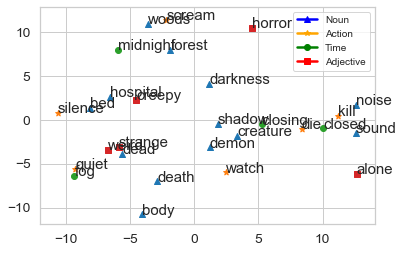

In [163]:
plt.scatter(result_noun[:,0],result_noun[:,1],marker="^")
plt.scatter(result_action[:,0],result_action[:,1],marker="*")
plt.scatter(result_time[:,0],result_time[:,1],marker="o")
plt.scatter(result_adjective[:,0],result_adjective[:,1],marker="s")
creepy_nounwords = list(creepy_nounembeddings)
creepy_actionwords = list(creepy_actionembeddings)
creepy_adjectivewords = list(creepy_adjectiveembeddings)
creepy_timewords = list(creepy_timeembeddings)
# for i, word in enumerate(creepy_nounwords):
#     plt.annotate(word, xy=(result_noun[i,0], result_noun[i,1]))
for i, word in enumerate(creepy_actionwords):
    plt.annotate(word, xy=(result_action[i,0], result_action[i,1]))
for i, word in enumerate(creepy_nounwords):
    plt.annotate(word, xy=(result_noun[i,0], result_noun[i,1]))
for i, word in enumerate(creepy_adjectivewords):
    plt.annotate(word, xy=(result_adjective[i,0], result_adjective[i,1]))
for i, word in enumerate(creepy_timewords):
    plt.annotate(word, xy=(result_time[i,0], result_time[i,1]))

import matplotlib.lines as mlines
# plt.legend([result_noun[:1]], ["Attr A"])

blue_line = mlines.Line2D([], [], color='blue', marker='^',
                          markersize=6, label='Noun')
orange_line = mlines.Line2D([], [], color='orange', marker='*',
                          markersize=6, label='Action')
green_line = mlines.Line2D([], [], color='green', marker='o',
                          markersize=6, label='Time')
red_line = mlines.Line2D([], [], color='red', marker='s',
                          markersize=6, label='Adjective')
plt.legend(handles=[blue_line,orange_line,green_line,red_line],prop={'size': 10})

# plt.show()

## Synsets

In [4]:
## We now try to identify creepiness of posts by looking at references of feeling "scared". We look at the occurrences of such 
##synonyms within all subreddits

from nltk.corpus import wordnet
from textblob import Word

def find_synonyms(word):
    #add a lemmatizer here to connect to n-grams?
    synonyms = []
#     antonyms = []

    for syn in wordnet.synsets(word):
        for l in syn.lemmas():
            synonyms.append(l.name())
#             if l.antonyms():
#                 antonyms.append(l.antonyms()[0].name())

    return set(synonyms)

In [19]:
creepy = Word("scared")
data_counts = dict()

l = pd.read_csv("RS_2016-02_creepypasta.csv")
df = pd.DataFrame(l)
keys = find_synonyms(creepy)
print(keys)

count = 0
num_passages = 0
for passage in df['selftext'].dropna():
#     if(passage!="[deleted]"):
#         continue
    num_passages+=1
    for w in keys:
        try:
            if w in passage:
                count+=1
        except TypeError:
            pass
print(count,num_passages)
data_counts.update({"creepypasta":count/num_passages})

{'scare_away', 'frightened', 'pock', 'frighten_off', 'mark', 'scare_off', 'dash', 'scared', 'affright', 'pit', 'scar', 'daunt', 'scare', 'frighten_away', 'fright', 'frighten', 'pall'}
239 185


In [16]:
l = pd.read_csv("Confession/RS_Confession.csv")
df = pd.DataFrame(l)
keys = find_synonyms(creepy)
print(keys)

count = 0
num_passages = 0
for passage in df['selftext'].dropna():
#     if(passage!="[deleted]"):
#         continue
    num_passages+=1
    for w in keys:
        try:
            if w in passage:
                count+=1
        except TypeError:
            pass
print(count,num_passages)
data_counts.update({"confession":count/num_passages})

{'scare_away', 'frightened', 'pock', 'frighten_off', 'mark', 'scare_off', 'dash', 'scared', 'affright', 'pit', 'scar', 'daunt', 'scare', 'frighten_away', 'fright', 'frighten', 'pall'}
65062 287429


In [25]:
l = pd.read_csv("StoriesAboutKevin/StoriesAboutKevin.csv")
df = pd.DataFrame(l)
keys = find_synonyms(creepy)
print(keys)

count = 0
num_passages = 0
for passage in df['selftext'].dropna():
#     if(passage!="[deleted]"):
#         continue
    num_passages+=1
    for w in keys:
        try:
            if w in passage:
                count+=1
        except TypeError:
            pass
print(count,num_passages)
data_counts.update({"storiesaboutkevin":count/num_passages})

{'scare_away', 'frightened', 'pock', 'frighten_off', 'mark', 'scare_off', 'dash', 'scared', 'affright', 'pit', 'scar', 'daunt', 'scare', 'frighten_away', 'fright', 'frighten', 'pall'}
1185 3780


In [31]:
l = pd.read_csv("TIFU/RS_2019-08_tifu.csv")
df = pd.DataFrame(l)
keys = find_synonyms(creepy)
print(keys)

count = 0
num_passages = 0
for passage in df['selftext'].dropna():
#     if(passage!="[deleted]"):
#         continue
    num_passages+=1
    for w in keys:
        try:
            if w in passage:
                count+=1
        except TypeError:
            pass
print(count,num_passages)
data_counts.update({"tifu":count/num_passages})

{'scare_away', 'frightened', 'pock', 'frighten_off', 'mark', 'scare_off', 'dash', 'scared', 'affright', 'pit', 'scar', 'daunt', 'scare', 'frighten_away', 'fright', 'frighten', 'pall'}
1066 7214


In [38]:
l = pd.read_csv("Confessions/RS_2013-12_confessions.csv")
df = pd.DataFrame(l)
keys = find_synonyms(creepy)
print(keys)

count = 0
num_passages = 0
for passage in df['selftext'].dropna():
#     if(passage!="[deleted]"):
#         continue
    num_passages+=1
    for w in keys:
        try:
            if w in passage:
                count+=1
        except TypeError:
            pass
print(count,num_passages)
data_counts.update({"confessions":count/num_passages})

{'scare_away', 'frightened', 'pock', 'frighten_off', 'mark', 'scare_off', 'dash', 'scared', 'affright', 'pit', 'scar', 'daunt', 'scare', 'frighten_away', 'fright', 'frighten', 'pall'}
69 225


In [39]:
data_counts

{'creepypasta': 1.2918918918918918,
 'confession': 0.22635850940580107,
 'storiesaboutkevin': 0.3134920634920635,
 'tifu': 0.14776822844469087,
 'confessions': 0.30666666666666664}

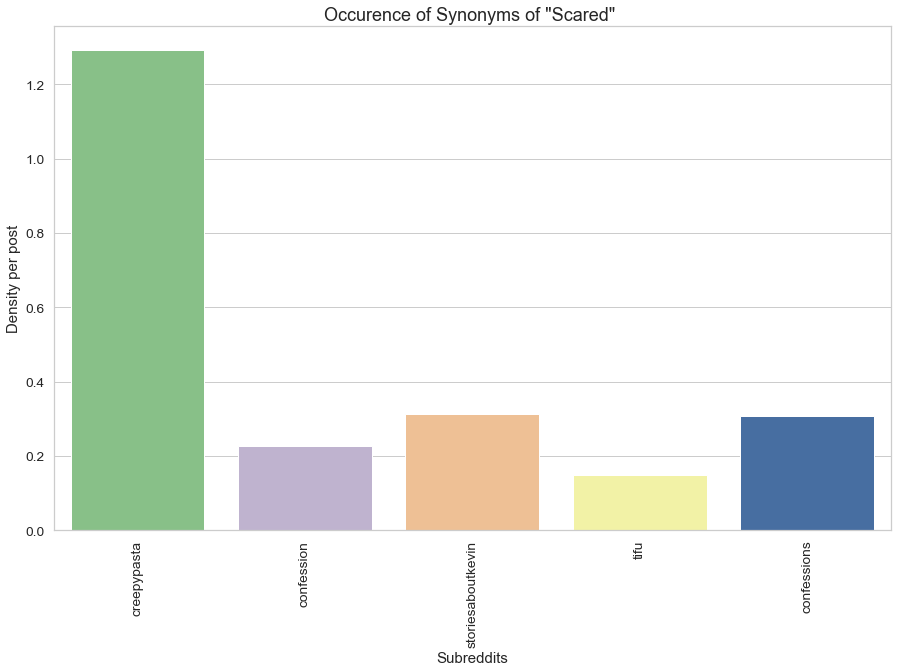

In [168]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data):
    
#     count_dict = (zip(words, total_counts))
#     count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[30:80]
    count_dict = count_data
    words = [w for w in count_dict.keys()]
    counts = [w1 for w1 in count_dict.values()]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.title("Occurence of Synonyms of \"Scared\" ", size=18)
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='Accent')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('Subreddits')
    plt.ylabel('Density per post')
    plt.show()

plot_10_most_common_words(data_counts)